In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = './dogs/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [2]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [3]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


train_generator = data_generator_with_aug.flow_from_directory(
        'dogs/images/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'dogs/images/val',
        target_size=(image_size, image_size),
        class_mode='categorical')




Found 260 images belonging to 2 classes.
Found 296 images belonging to 2 classes.


In [5]:
my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/3
5/5 [==============================] - 29s 6s/step - loss: 0.4343 - acc: 0.7833 - val_loss: 0.5909 - val_acc: 0.6875
Epoch 2/3
5/5 [==============================] - 25s 5s/step - loss: 0.2938 - acc: 0.8966 - val_loss: 0.3443 - val_acc: 0.7500
Epoch 3/3
5/5 [==============================] - 27s 5s/step - loss: 0.1648 - acc: 0.9417 - val_loss: 0.1884 - val_acc: 0.9375


In [6]:
my_new_model.evaluate_generator(generator=validation_generator)

[0.18575302531590332, 0.9222972972972973]

In [7]:
my_new_model.metrics_names

['loss', 'acc']

dog
0.9063056


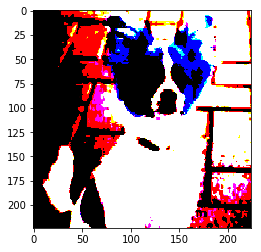

whale
0.99737984


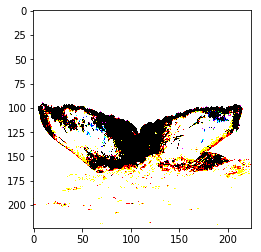

whale
0.99306506


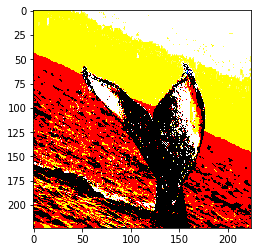

dog
0.98000586


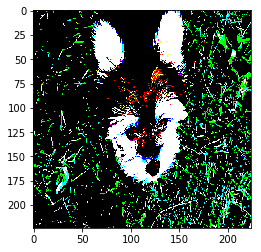

whale
0.96897495


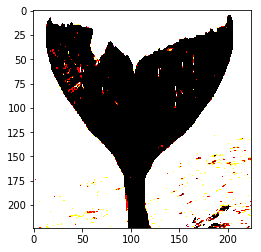

In [19]:
import matplotlib.pyplot as plt

labels = ["dog", "whale"]

x_batch, y_batch = next(validation_generator)

for i in range (0,5):
    image = x_batch[i]
    pred = my_new_model.predict(x_batch[i:i+1])
    print(labels[pred.argmax()])
    print(pred[0][pred.argmax()])
#     print(pred[pred.argmax()])
    plt.imshow(image)
    plt.show()
    